In [25]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



## Load the data

In [4]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.shape

(545, 13)

# Regression problem

In [7]:
X = df.drop(["price"], axis = 1)
Y = df[["price"]]

In [8]:
X.nunique()

area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [9]:

column_to_encode = "furnishingstatus"

X_OH = pd.get_dummies(X, columns=[column_to_encode])

X_OH.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,yes,no,no,no,yes,2,yes,True,False,False
1,8960,4,4,4,yes,no,no,no,yes,3,no,True,False,False
2,9960,3,2,2,yes,no,yes,no,no,2,yes,False,True,False
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,True,False,False
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,True,False,False


In [10]:
columns_to_encode = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']

for col in columns_to_encode:
    X_OH[col] = df[col].map({'yes': 1, 'no': 0})
X_OH.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_OH, Y, test_size=0.20, random_state=42)

In [12]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
scaled_X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,0.384168,0.055271,1.539173,2.587644,0.407155,-0.466773,-0.746420,-0.230521,1.501243,0.367957,-0.552620,1.711119,-0.870669,-0.676900
93,0.929181,0.055271,1.539173,-0.912499,0.407155,-0.466773,1.339728,-0.230521,1.501243,2.709987,-0.552620,-0.584413,1.148542,-0.676900
335,-0.607755,-1.283514,-0.557950,-0.912499,0.407155,-0.466773,1.339728,-0.230521,1.501243,1.538972,-0.552620,1.711119,-0.870669,-0.676900
412,-1.155492,0.055271,-0.557950,0.254215,0.407155,-0.466773,1.339728,-0.230521,-0.666115,-0.803059,1.809561,-0.584413,-0.870669,1.477322
471,-0.637730,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-0.584413,-0.870669,1.477322


In [14]:
scaled_X_train.shape

(436, 14)

In [15]:
scaled_X_test = scaler.transform(X_test)

### now the model

In [16]:
input_shape = (X_train.shape[1],) 
input_shape

(14,)

In [38]:

model_1 = tf.keras.models.Sequential([
    tf.keras.Input(input_shape) # 14
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1, activation='linear'), 
])

/home/dany/NN_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss='mse',
                metrics=['mse'])

In [40]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
hist_1 = model_1.fit(scaled_X_train, y_train,
          batch_size=16, epochs=1000,
          validation_data=(scaled_X_test, y_test))

Epoch 1/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 24084899430400.0000 - mse: 24084899430400.0000 - val_loss: 30129963139072.0000 - val_mse: 30129963139072.0000
Epoch 2/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25930103783424.0000 - mse: 25930103783424.0000 - val_loss: 30129931681792.0000 - val_mse: 30129931681792.0000
Epoch 3/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25936835641344.0000 - mse: 25936835641344.0000 - val_loss: 30129879252992.0000 - val_mse: 30129879252992.0000
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25347575775232.0000 - mse: 25347575775232.0000 - val_loss: 30129791172608.0000 - val_mse: 30129791172608.0000
Epoch 5/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24594750636032.0000 - mse: 24594750636032.0000 - val_loss: 30129650663424.0000 - val_mse: 30129650663424.0000
Epoch 6/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24751871361024.0000 - mse: 24751871361024.0000 - val_loss: 30129438851072.0000 - val_mse: 

In [42]:
model_1.evaluate(scaled_X_test, y_test)[1]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1711738191872.0000 - mse: 1711738191872.0000  


1824252624896.0

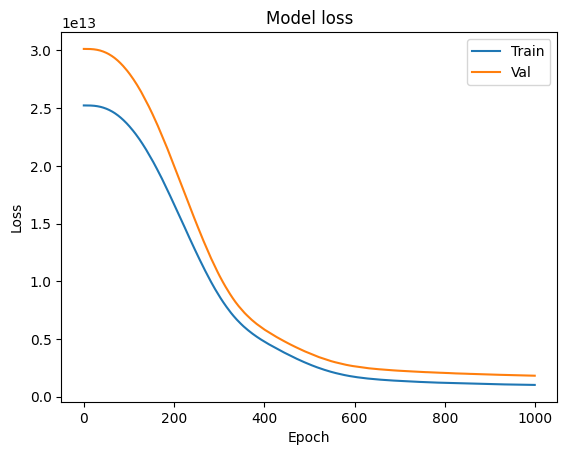

In [43]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


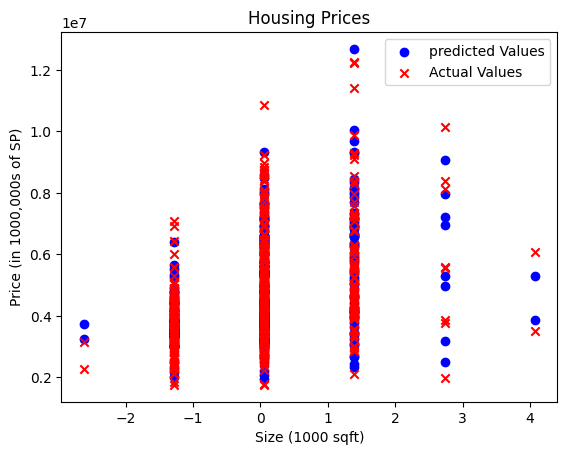

In [50]:
f_wb = model_1.predict(scaled_X_train)
X_train_np = np.array(scaled_X_train)

plt.scatter(X_train_np[:,1], f_wb, c='b', marker='o',label='predicted Values')

# Plot the data points
plt.scatter(X_train_np[:,1], y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000,000s of SP)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


In [48]:
scaled_X_test.tail(10) 

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
149,0.656674,1.394055,1.539173,-0.912499,0.407155,-0.466773,1.339728,-0.230521,-0.666115,-0.803059,1.809561,-0.584413,1.148542,-0.6769
467,-0.869361,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,1.538972,-0.552620,-0.584413,1.148542,-0.6769
18,-0.251680,0.055271,1.539173,0.254215,0.407155,2.142369,-0.746420,-0.230521,1.501243,1.538972,-0.552620,1.711119,-0.870669,-0.6769
208,-0.991988,0.055271,-0.557950,1.420929,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-0.584413,1.148542,-0.6769
153,-0.842110,0.055271,3.636297,0.254215,0.407155,-0.466773,1.339728,-0.230521,-0.666115,-0.803059,-0.552620,-0.584413,1.148542,-0.6769
15,0.384168,1.394055,-0.557950,0.254215,0.407155,-0.466773,1.339728,-0.230521,-0.666115,1.538972,-0.552620,-0.584413,1.148542,-0.6769
357,0.806553,1.394055,-0.557950,0.254215,-2.456066,-0.466773,-0.746420,-0.230521,-0.666115,0.367957,-0.552620,1.711119,-0.870669,-0.6769
39,0.384168,1.394055,1.539173,2.587644,0.407155,-0.466773,-0.746420,-0.230521,1.501243,0.367957,-0.552620,-0.584413,1.148542,-0.6769
54,0.384168,0.055271,1.539173,0.254215,0.407155,2.142369,-0.746420,-0.230521,1.501243,0.367957,-0.552620,-0.584413,1.148542,-0.6769
155,0.429586,0.055271,1.539173,-0.912499,0.407155,-0.466773,1.339728,-0.230521,-0.666115,1.538972,1.809561,1.711119,-0.870669,-0.6769


In [49]:
import numpy as np
i = 70

inpt = np.reshape(scaled_X_test.loc[i].to_numpy(), (1,14))

print(f'predicted value:{model_1.predict(inpt)}, actual value: {y_test.loc[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predicted value:[[6478102.5]], actual value: price    6790000
Name: 70, dtype: int64
